In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 设置细胞数、时间步

In [2]:
num_cell = 50
time_step = 50
rule_index = 1

# CA模型计算

In [3]:
def CA(num_cell , time_step , rule_index, ifrandom):
    if ifrandom:
        log = np.random.randint(0,2,(time_step+1,num_cell))
    else:
        log = np.zeros((time_step+1,num_cell),dtype = int)
        log[0][25] = 1
    
    next_binary = '{:08b}'.format(rule_index)
    previous_state = {}

    for i in range(0,8):
        previous_state[i] =  '{:03b}'.format(i)

    next_state = {7 - i:j  for i,j in enumerate(next_binary)}
    previous_to_next = {previous_state[i]:next_state[i] for i in range(0,8)}
    
    for step in range(1,time_step + 1):
        for cell in range (0,num_cell):
            if cell == 0:
                previou_cell = log[step-1][-1]
                current_cell = log[step-1][cell]
                next_cell = log[step-1][cell+1]
            elif cell == num_cell-1:
                previou_cell = log[step-1][cell-1]
                current_cell = log[step-1][cell]
                next_cell = log[step-1][0]
            else:
                previou_cell = log[step-1][cell-1]
                current_cell = log[step-1][cell]
                next_cell = log[step-1][cell+1]

            now = previous_to_next[str(previou_cell)+str(current_cell)+str(next_cell)]
            log[step][cell] = int(now)
    return log

# 画图 从模型70到185，每个模型分别两张图（中心值为1，随机初始化）

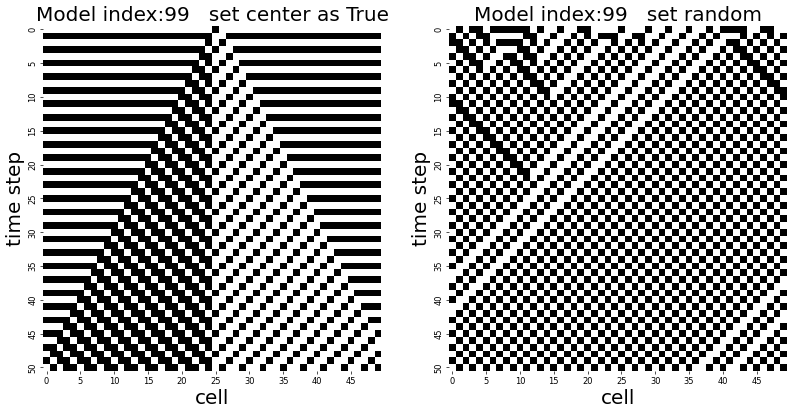

In [4]:
for i in range(99,100):
    fig = plt.figure(figsize = (16, 8),dpi = 60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    sns.heatmap(data = CA(num_cell , time_step , rule_index = i ,ifrandom = False),ax = ax1,square=True,cbar=False,xticklabels =5,yticklabels =5,cmap="Greys")
    ax1.set_title('Model index:'+str(i)+'   set center as True',fontsize = 24)
    ax1.set_xlabel("cell",fontsize = 24)
    ax1.set_ylabel("time step",fontsize = 24)
    
    sns.heatmap(data = CA(num_cell , time_step , rule_index = i , ifrandom = True),ax = ax2,square=True,cbar=False,xticklabels =5,yticklabels =5,cmap="Greys")
    ax2.set_title('Model index:' + str(i) + '   set random',fontsize = 24)
    ax2.set_xlabel("cell",fontsize = 24)
    ax2.set_ylabel("time step",fontsize = 24)
    
    plt.savefig('result/index_' + str(i) + 'center' + '.jpg',dpi = 400,bbox_inches = 'tight')
    plt.show()

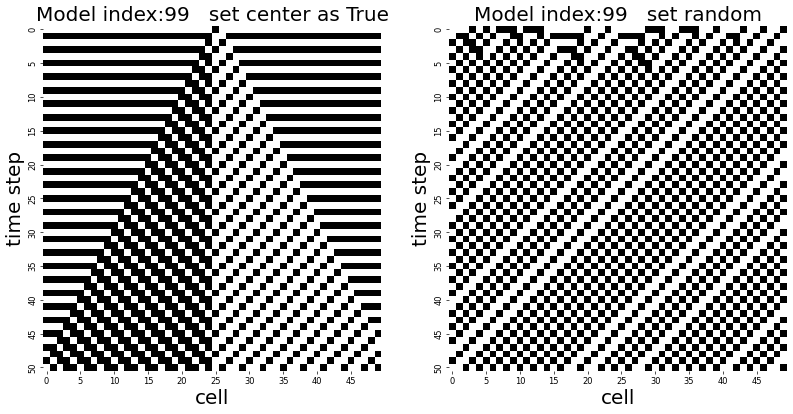

In [5]:
i=99
fig = plt.figure(figsize = (16, 8),dpi = 60)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.heatmap(data = CA(num_cell , time_step , rule_index = i ,ifrandom = False),ax = ax1,square=True,cbar=False,xticklabels =5,yticklabels =5,cmap="Greys")
ax1.set_title('Model index:'+str(i)+'   set center as True',fontsize = 24)
ax1.set_xlabel("cell",fontsize = 24)
ax1.set_ylabel("time step",fontsize = 24)

sns.heatmap(data = CA(num_cell , time_step , rule_index = i , ifrandom = True),ax = ax2,square=True,cbar=False,xticklabels =5,yticklabels =5,cmap="Greys")
ax2.set_title('Model index:' + str(i) + '   set random',fontsize = 24)
ax2.set_xlabel("cell",fontsize = 24)
ax2.set_ylabel("time step",fontsize = 24)

plt.savefig('result/index_' + str(i) + 'center' + '.jpg',dpi = 400,bbox_inches = 'tight')
plt.show()